# Arsenal & Tottenham Social Sentiment Analysis
## Forecasting User Sentiment over 5 different Seasons
by *Ben N. Bellman* 
<br> Prepared for Springboard
<br> *4/13/2022*

<img src="../images/who-s-denilo-SuBb_SiEEM8-unsplash.jpg" style="width:800px;height:400px"/>

### WARNING: 
*Although the usernames have been anonymized as to protect the privacy of the users in this analysis, the tweets are still in raw format and may contain inappropriate / sensitive content. Viewer discretion is advised*

# Outline

1. Introduction
2. Data Wrangling and Exploration
3. Exploratory Data Analysis 
4. Modelling 
5. Conclusion / Recommendations.

# Introduction

One of the important things to know for the analysis is the schedule of the games.
The objective in the social sentiment analysis is to predict whether or not a specific tweet is likely to come  

In [1]:
## We start by importing the packages we will use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scattertext
import spacy


import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 

from wordcloud import WordCloud
import nltk
from nltk.stem.porter import PorterStemmer

import re

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb 

from sklearn.metrics import precision_recall_curve, roc_curve, auc, confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error as mae, f1_score, fbeta_score 
from sklearn.metrics import plot_confusion_matrix,classification_report, balanced_accuracy_score, recall_score
from sklearn.metrics import roc_auc_score, log_loss,matthews_corrcoef, ConfusionMatrixDisplay

from io import StringIO 
from IPython.display import Image,HTML 
import shap

#nltk.download('punkt')      ## Uncomment to run
#nltk.download('stopwords')  ## Uncomment to run

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth',-1)
%matplotlib inline

In [2]:
## Import Functions from pandas module.
import sys
sys.path.insert(1, './../../Analysis_Functions_For_Pandas') ## I have my own folder for analysis. 
from functions import (preview_data,
                       get_missing_counts,
                       get_value_counts,
                       get_unique_column_count,
                       get_datetimes,
                       plot_roc_curves,
                       get_model_metrics)   

## I. Data Wrangling & Exploration

We use Twitter Scraper to collect the tweets. The Twitter Scraper is a Python file which calls on the snp Twitter scraper module. The file created is modified to generate loops which can feed the scraper multiple queries. In this analysis, we anonymized the tweets in Excel, but anyone can run. The objective of the Twitter Scraper is to collect

<br> In total, there will be a total of **370,000** tweets.
- 1000 tweets per game
- 2 different teams: TottenHam HotSpur and Arsenal
- 38 different games: Number of Home and Away Games for a team in a season. 
- 5 seasons of data between 2016 and 2022: 10 games are missing for both teams for the last seasons 

In [3]:
## Load the Data
df = pd.read_csv('.\..\Data\Finalized_DataFrame_All_Data_Anonymized.csv')

In [4]:
## Start by previewing the data:
preview_data(df)

First Five Rows of Data: 



,Query2,Date,Username,Tweet,TweetLikes,TweetReplies,RetweetCount,Result,Team
0,Arsenal until:2022-04-24,2022-04-23 23:59:47+00:00,Anonymous19203,@JackAFC01 @LUHG450 @1Thegameis Because you're arsenal and you have no self awareness..in our worst season in years and your best season in years and you only 6 points ahead of us and you think the gap is that big lol 🤣be real now,1,1,0,1,Arsenal
1,Arsenal until:2022-04-24,2022-04-23 23:59:41+00:00,Anonymous123302,@arsenal_lady bei ihm werde ich einfach immer schwach,1,0,0,1,Arsenal
2,Arsenal until:2022-04-24,2022-04-23 23:59:39+00:00,Anonymous134105,"5 games to go\n\n5 cup finals \n\n5 games to UCL or UEL, either way I want my European trips back.\n\nWe can do it @Arsenal",0,0,0,1,Arsenal
3,Arsenal until:2022-04-24,2022-04-23 23:59:37+00:00,Anonymous112922,"@Arsenal @HectorBellerin VAMOS @HectorBellerin ! Even if you stay in Spain, you'll always be loved in North London ;-)",18,0,0,1,Arsenal
4,Arsenal until:2022-04-24,2022-04-23 23:59:32+00:00,Anonymous65885,@Cristiano Come to @Arsenal 🐐.. so many assists and crosses with no one to finish/ tap in.,0,0,0,1,Arsenal



 Shape: 

(370000, 9)

 Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370000 entries, 0 to 369999
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Query2        370000 non-null  object
 1   Date          370000 non-null  object
 2   Username      370000 non-null  object
 3   Tweet         370000 non-null  object
 4   TweetLikes    370000 non-null  int64 
 5   TweetReplies  370000 non-null  int64 
 6   RetweetCount  370000 non-null  int64 
 7   Result        370000 non-null  int64 
 8   Team          370000 non-null  object
dtypes: int64(4), object(5)
memory usage: 25.4+ MB
None


In [5]:
## Get the missing values
get_missing_counts(df)

Missing Value Percentages by Column: 

Query2 -----> 0 -----> 0.0%
Date -----> 0 -----> 0.0%
Username -----> 0 -----> 0.0%
Tweet -----> 0 -----> 0.0%
TweetLikes -----> 0 -----> 0.0%
TweetReplies -----> 0 -----> 0.0%
RetweetCount -----> 0 -----> 0.0%
Result -----> 0 -----> 0.0%
Team -----> 0 -----> 0.0%


In [6]:
## Get unique values in each column: 
get_unique_column_count(df)

Unique values in each object column: 

Query2: 370
Date: 317152
Username: 200163
Tweet: 364939
Team: 2


## II. Data Wrangling

In [7]:
## Remove Usernames
def remove_usernames_links(tweet):
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('http[^\s]+','',tweet)
    return tweet
df['CleanTweet'] = df['Tweet'].apply(remove_usernames_links)
df.head(3)

,Query2,Date,Username,Tweet,TweetLikes,TweetReplies,RetweetCount,Result,Team,CleanTweet
0,Arsenal until:2022-04-24,2022-04-23 23:59:47+00:00,Anonymous19203,@JackAFC01 @LUHG450 @1Thegameis Because you're arsenal and you have no self awareness..in our worst season in years and your best season in years and you only 6 points ahead of us and you think the gap is that big lol 🤣be real now,1,1,0,1,Arsenal,Because you're arsenal and you have no self awareness..in our worst season in years and your best season in years and you only 6 points ahead of us and you think the gap is that big lol 🤣be real now
1,Arsenal until:2022-04-24,2022-04-23 23:59:41+00:00,Anonymous123302,@arsenal_lady bei ihm werde ich einfach immer schwach,1,0,0,1,Arsenal,bei ihm werde ich einfach immer schwach
2,Arsenal until:2022-04-24,2022-04-23 23:59:39+00:00,Anonymous134105,"5 games to go\n\n5 cup finals \n\n5 games to UCL or UEL, either way I want my European trips back.\n\nWe can do it @Arsenal",0,0,0,1,Arsenal,"5 games to go\n\n5 cup finals \n\n5 games to UCL or UEL, either way I want my European trips back.\n\nWe can do it"


In [8]:
## Replace Punctuation
df['CleanTweet'] = df['CleanTweet'].str.replace("[^a-zA-Z#]"," ")
df.head(3)

,Query2,Date,Username,Tweet,TweetLikes,TweetReplies,RetweetCount,Result,Team,CleanTweet
0,Arsenal until:2022-04-24,2022-04-23 23:59:47+00:00,Anonymous19203,@JackAFC01 @LUHG450 @1Thegameis Because you're arsenal and you have no self awareness..in our worst season in years and your best season in years and you only 6 points ahead of us and you think the gap is that big lol 🤣be real now,1,1,0,1,Arsenal,Because you re arsenal and you have no self awareness in our worst season in years and your best season in years and you only points ahead of us and you think the gap is that big lol be real now
1,Arsenal until:2022-04-24,2022-04-23 23:59:41+00:00,Anonymous123302,@arsenal_lady bei ihm werde ich einfach immer schwach,1,0,0,1,Arsenal,bei ihm werde ich einfach immer schwach
2,Arsenal until:2022-04-24,2022-04-23 23:59:39+00:00,Anonymous134105,"5 games to go\n\n5 cup finals \n\n5 games to UCL or UEL, either way I want my European trips back.\n\nWe can do it @Arsenal",0,0,0,1,Arsenal,games to go cup finals games to UCL or UEL either way I want my European trips back We can do it


In [9]:
## Summary Metrics: 

print('Average team Win: % {}'.format(round(len(df[(df['Result'] ==1)]) / len(df)*100,2)))
print('Arsenal Win: % {}'.format(round(len(df[(df['Team'] == 'Arsenal') & (df['Result'] == 1)]) / len(df[df['Team'] == 'Arsenal'])*100,2)))
print('Tottenham Win: % {}'.format(round(len(df[(df['Team'] == 'Tottenham') & (df['Result'] == 1)]) / len(df[df['Team'] == 'Tottenham'])*100,2)))
print(len(df))

Average team Win: % 51.08
Arsenal Win: % 49.19
Tottenham Win: % 52.97
370000


# Exploratory Data Analysis

#### 1) Users with Most Tweets

#### 2) Most Popular Tweets

In [10]:
## Let's look at the most popular users
most_liked_tweets = pd.DataFrame(df.groupby('Tweet')['TweetLikes'].sum().sort_values(ascending=False)).reset_index().head(30)
most_liked_tweets

,Tweet,TweetLikes
0,Great start of the year. Let’s keep improving together #alltogether #arsenal 2-0 #arsenalvsmanutd https://t.co/PWvqTSyMMm,85832
1,That winnin' feeling 🙌🏼😀 #letskeepthisgoing #YaGunnersYa #M1Ö @arsenal https://t.co/spMq7dx0BR,65144
2,Pochettino was dismissed from Tottenham and won two trophies in his first season with PSG 🏆 https://t.co/O4cj0xHb7Q,40817
3,Incredible. Inconceivable.\n\nWe have no words for this. https://t.co/eQAUaKleRi,36590
4,"Great effort from the boys, three points and we keep going! \n#W12 #premierleague #arsenal https://t.co/Ip1jRpsiqG",34758
5,Who’s ur ride or die for Super Bowl Sunday Football???\n\n21 Savage: Arsenal \n\nICE: https://t.co/qbvp5ZP8ZW,31388
6,"Arsenal using my theme song. The only thing missing, due to COVID, is 30,000 fans chanting “You Suck”. #YouSuckCovid #itstrue https://t.co/VQncpBsoin",30610
7,This guy... \n\n🥰🥰🥰 https://t.co/z9e8hfb7oS,30353
8,"Unreal, @dele_official! 🔥\n\n#THFC ⚪️ #COYS https://t.co/VWcXKZgpeq",29402
9,"Copa del Rey: 𝗖𝗵𝗮𝗺𝗽𝗶𝗼𝗻 🏆 \n\nCongratulations, @HectorBellerin ✊\n\n#CopaDelRey | #BetisAlé https://t.co/1QOHlYSxVu",29200


#### 3) Most Popular Hashtags 

In [11]:
# Getting Most Popular Hashtags
def hashtag_extract(tweets):
    hashtags = []
    #loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

## Extract hashtags from positive and negative results.
ht_positive = hashtag_extract(df['Tweet'][df['Result']==1])
ht_negative = hashtag_extract(df['Tweet'][df['Result']==0])

## Extract hashtags from positive and negative results for Arsenal.
ht_positive_arsenal = hashtag_extract(df['Tweet'][(df['Result']==1) & (df['Team'] =='Arsenal')])
ht_negative_arsenal = hashtag_extract(df['Tweet'][(df['Result']==0) & (df['Team'] =='Arsenal')])

## Extract hashtags from positive and negative results for Tottenham.
ht_positive_spurs = hashtag_extract(df['Tweet'][(df['Result']==1) & (df['Team'] =='Tottenham')])
ht_negative_spurs = hashtag_extract(df['Tweet'][(df['Result']==0) & (df['Team'] =='Tottenham')])


## Unnest lists 
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

ht_positive_arsenal = sum(ht_positive_arsenal, [])
ht_negative_arsenal = sum(ht_negative_arsenal, [])

ht_positive_spurs = sum(ht_positive_spurs, [])
ht_negative_spurs = sum(ht_negative_spurs, [])



## Get distribution of hashtags when team is winning and losing. 
freq = nltk.FreqDist(ht_positive)
pos = pd.DataFrame({'Hashtag':list(freq.keys()),
                  'Count':list(freq.values())})

freq_neg = nltk.FreqDist(ht_negative)
neg = pd.DataFrame({'Hashtag':list(freq_neg.keys()),
                  'Count':list(freq_neg.values())})

## For Arsenal
freq_arsenal = nltk.FreqDist(ht_positive_arsenal)
pos_arsenal = pd.DataFrame({'Hashtag':list(freq_arsenal.keys()),
                  'Count':list(freq_arsenal.values())})

freq_neg_arsenal = nltk.FreqDist(ht_negative_arsenal)
neg_arsenal = pd.DataFrame({'Hashtag':list(freq_neg_arsenal.keys()),
                  'Count':list(freq_neg_arsenal.values())})
## For Spurs
freq_spurs = nltk.FreqDist(ht_positive_spurs)
pos_spurs = pd.DataFrame({'Hashtag':list(freq_spurs.keys()),
                  'Count':list(freq_spurs.values())})

freq_neg_spurs = nltk.FreqDist(ht_negative_spurs)
neg_spurs = pd.DataFrame({'Hashtag':list(freq_neg_spurs.keys()),
                  'Count':list(freq_neg_spurs.values())})

Text(0.5, 1.0, 'Most Popular Hashtag when Spurs Lose/Tie')

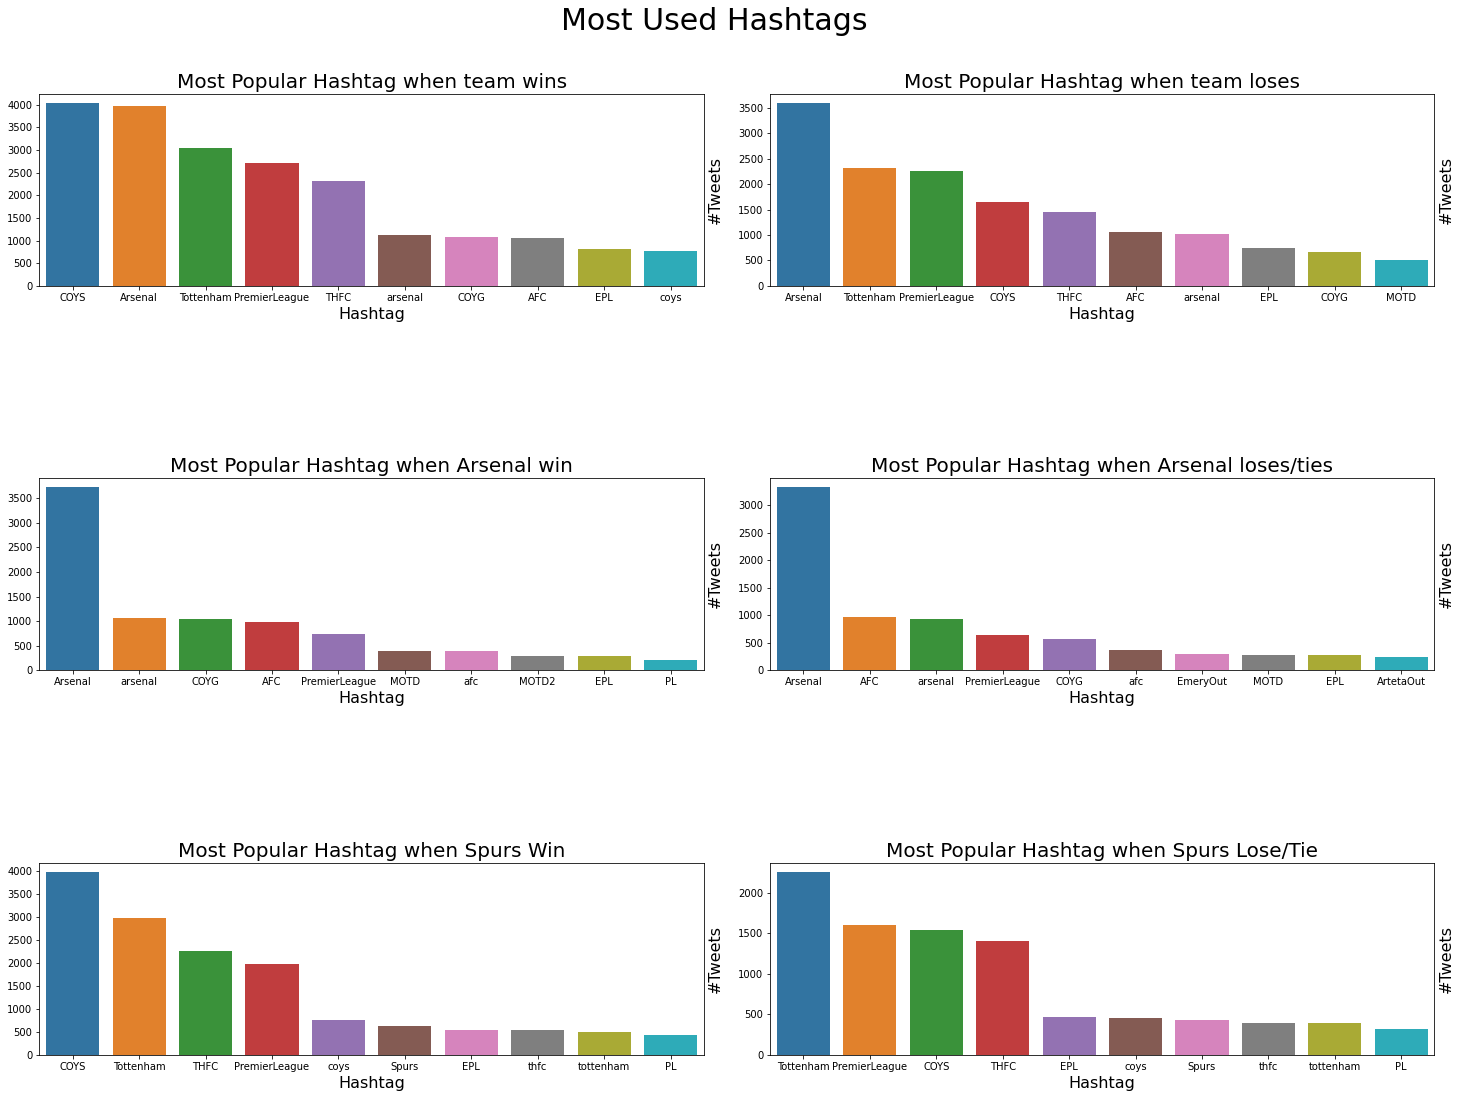

In [12]:
fig, axes = plt.subplots(3,2, figsize=(25,15))
plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=1.0, wspace=0.1)
fig.suptitle('Most Used Hashtags', fontsize =30)

pos = pos.nlargest(columns='Count', n=10)
neg = neg.nlargest(columns='Count', n=10)

pos_arsenal = pos_arsenal.nlargest(columns='Count', n=10)
neg_arsenal = neg_arsenal.nlargest(columns='Count', n=10)

pos_spurs = pos_spurs.nlargest(columns='Count', n=10)
neg_spurs = neg_spurs.nlargest(columns='Count', n=10)


## 1) Barplot of Winning Tweets
sns.barplot(ax = axes[0,0], y= 'Count', x='Hashtag', data = pos)
axes[0,0].set_ylabel('#Tweets', fontsize =16)
axes[0,0].yaxis.set_label_position('right')
axes[0,0].set_xlabel('Hashtag', fontsize =16)
axes[0,0].set_title('Most Popular Hashtag when team wins', fontsize =20)

## 2) Barplot of Losing Tweets
sns.barplot(ax = axes[0,1], y= 'Count', x='Hashtag', data = neg)
axes[0,1].set_ylabel('#Tweets', fontsize =16)
axes[0,1].yaxis.set_label_position('right')
axes[0,1].set_xlabel('Hashtag', fontsize =16)
axes[0,1].set_title('Most Popular Hashtag when team loses', fontsize =20)

## 3) Barplot when Arsenal Wins
sns.barplot(ax = axes[1,0], y= 'Count', x='Hashtag', data = pos_arsenal)
axes[1,0].set_ylabel('#Tweets', fontsize =16)
axes[1,0].yaxis.set_label_position('right')
axes[1,0].set_xlabel('Hashtag', fontsize =16)
axes[1,0].set_title('Most Popular Hashtag when Arsenal win', fontsize =20)

## 4) Barplot when Arsenal Loses
sns.barplot(ax = axes[1,1], y= 'Count', x='Hashtag', data = neg_arsenal)
axes[1,1].set_ylabel('#Tweets', fontsize =16)
axes[1,1].yaxis.set_label_position('right')
axes[1,1].set_xlabel('Hashtag', fontsize =16)
axes[1,1].set_title('Most Popular Hashtag when Arsenal loses/ties', fontsize =20)

## 5) Barplot when Spurs Wins
sns.barplot(ax = axes[2,0], y= 'Count', x='Hashtag', data = pos_spurs)
axes[2,0].set_ylabel('#Tweets', fontsize =16)
axes[2,0].yaxis.set_label_position('right')
axes[2,0].set_xlabel('Hashtag', fontsize =16)
axes[2,0].set_title('Most Popular Hashtag when Spurs Win', fontsize =20)

## 6) Barplot when Spurs Loses
sns.barplot(ax = axes[2,1], y= 'Count', x='Hashtag', data = neg_spurs)
axes[2,1].set_ylabel('#Tweets', fontsize =16)
axes[2,1].yaxis.set_label_position('right')
axes[2,1].set_xlabel('Hashtag', fontsize =16)
axes[2,1].set_title('Most Popular Hashtag when Spurs Lose/Tie', fontsize =20)

#### 4) Most Popular Non-Stopwords (excludes mentions of Arsenal and Tottenham/Spurs)

In [13]:
#from nltk.corpus import stopwords
'''
def content_text(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() in stopwords]
    return content
'''

"\ndef content_text(text):\n    stopwords = nltk.corpus.stopwords.words('english')\n    content = [w for w in text if w.lower() in stopwords]\n    return content\n"

In [14]:
## Collect all the tweets in our dataframe and store it into a list.
tweets = []
for i in df['CleanTweet']:
    tweets.append(i)

## For each tweet, extract each word and put it into all_words. Remove https links and user mentions.
all_words = []
for tweet in tweets:
    for word in tweet.split(' '):
        if word.startswith('https://'):
            word = " "
        if word.startswith('@'):
            word = " "
        if word.startswith('Arse') or word.startswith('arse'):   ##Uncomment to remove all Arsenal mentions.
            word = " "
        if word.startswith('Tott') or word.startswith('tott'): ##Uncomment to remove all Tottenham mentions.  
            word = " "
        if len(word) <= 3:
            word = " " 
        all_words.append(word)

## Get the first one million words and create a wordcloud.  
list_of_words = " "
for i in all_words: 
    list_of_words += (i+ " " )

In [15]:
## Tokenize the words

allWords = nltk.tokenize.word_tokenize(list_of_words)
allWordDist = nltk.FreqDist(w.lower() for w in allWords)

stopwords = nltk.corpus.stopwords.words('english')
extra = ['.',",","#",",","!","?","ðÿ",":","”","'s","arsenal","spurs","hotspur","tottenham"," arsenal"," spurs","today"]
stopwords.extend(extra)
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)  

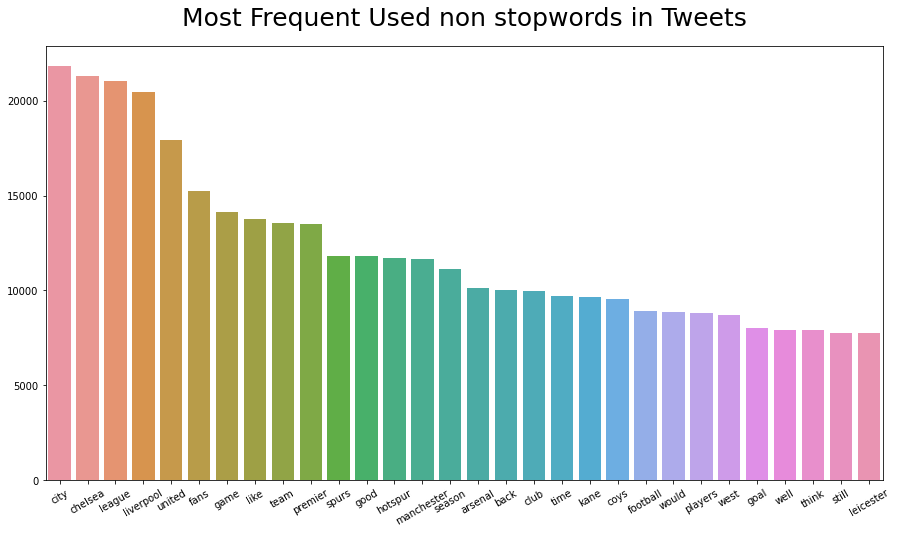

In [16]:
all_fdist = allWordExceptStopDist.most_common(30)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);
plt.title('Most Frequent Used non stopwords in Tweets', pad =20, fontsize = 25)
plt.show()

# Data Preprocessing And Modelling

In [17]:
## Create Simplified DataFrame
simp = df[['Username','Result','CleanTweet','Query2','Team']]
simp.head()

,Username,Result,CleanTweet,Query2,Team
0,Anonymous19203,1,Because you re arsenal and you have no self awareness in our worst season in years and your best season in years and you only points ahead of us and you think the gap is that big lol be real now,Arsenal until:2022-04-24,Arsenal
1,Anonymous123302,1,bei ihm werde ich einfach immer schwach,Arsenal until:2022-04-24,Arsenal
2,Anonymous134105,1,games to go cup finals games to UCL or UEL either way I want my European trips back We can do it,Arsenal until:2022-04-24,Arsenal
3,Anonymous112922,1,VAMOS Even if you stay in Spain you ll always be loved in North London,Arsenal until:2022-04-24,Arsenal
4,Anonymous65885,1,Come to so many assists and crosses with no one to finish tap in,Arsenal until:2022-04-24,Arsenal


In [18]:
## Replace 1 with Win and 0 with Loss/Tie
simp.loc[:,"Result"] = simp.Result.replace(1,'Win').replace(0,'Loss/Tie')
simp.head()

,Username,Result,CleanTweet,Query2,Team
0,Anonymous19203,Win,Because you re arsenal and you have no self awareness in our worst season in years and your best season in years and you only points ahead of us and you think the gap is that big lol be real now,Arsenal until:2022-04-24,Arsenal
1,Anonymous123302,Win,bei ihm werde ich einfach immer schwach,Arsenal until:2022-04-24,Arsenal
2,Anonymous134105,Win,games to go cup finals games to UCL or UEL either way I want my European trips back We can do it,Arsenal until:2022-04-24,Arsenal
3,Anonymous112922,Win,VAMOS Even if you stay in Spain you ll always be loved in North London,Arsenal until:2022-04-24,Arsenal
4,Anonymous65885,Win,Come to so many assists and crosses with no one to finish tap in,Arsenal until:2022-04-24,Arsenal


In [19]:
## Get info 
n_tweets = len(simp)
n_users = simp.Username.unique().size
n_games = simp.Query2.unique().size

print("Number of tweets: {:d}".format(n_tweets))
print("Number of users: {:d}".format(n_users))
print("Number of games: {:d}".format(n_games))

Number of tweets: 370000
Number of users: 200163
Number of games: 370


In [20]:
## We Create X and y
def make_xy(simp, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(simp.CleanTweet)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (simp.Result == 'Win').values.astype(np.int)
    #print(vectorizer.get_feature_names())
    return X, y
X, y = make_xy(simp)

In [21]:
## Train Test-Split
xtrain, xtest, ytrain, ytest = train_test_split(X,y)
clf = MultinomialNB().fit(xtrain, ytrain)
train_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)
print('Multinomial Naive Bayes')
print('Accuracy on the test set: {}'.format(test_accuracy))
print('Accuracy on the training set: {}'.format(train_accuracy))

Multinomial Naive Bayes
Accuracy on the test set: 0.6204540540540541
Accuracy on the training set: 0.6979423423423423


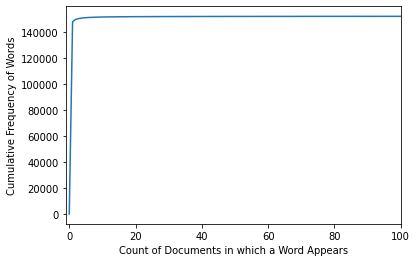

In [22]:
# For each word, count the number of documents that contains it 
count = (X>0).sum(axis=0).tolist()[0]
count = sorted(count)
n = np.unique(count)

# Compute the frequency of words that appear in exactly k documents
freq, cat = np.histogram(count, bins = len(n))
cumfreq = np.cumsum(freq)
cumfreq = np.insert(cumfreq,0,0)
n = np.insert(n,0,0)

plt.plot(n,cumfreq)
plt.xlim(-1,100)
plt.xlabel('Count of Documents in which a Word Appears')
plt.ylabel('Cumulative Frequency of Words')
plt.show()

In [23]:
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(nfold).split(X): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit the classifier, passed is as clf.
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [24]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    losstie = y == 0
    win = ~losstie
    return prob[losstie, 0].sum() + prob[win, 1].sum()

In [25]:
itrain, itest = train_test_split(range(simp.shape[0]), train_size=0.7)
mask = np.zeros(simp.shape[0], dtype=np.bool)
mask[itest] = True

#### MultinomialNB model

In [65]:
vectorizer = TfidfVectorizer(min_df=30, stop_words='english')
X, y = make_xy(simp, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

In [66]:
clf = MultinomialNB()
clf_param_grid = {'alpha': [.1,.5,1]}
clf_NB_CV_overall = GridSearchCV(clf, clf_param_grid, cv = 5).fit(xtrain,ytrain) 
clf_NB_CV_overall.best_params_

{'alpha': 1}

In [67]:
clf = MultinomialNB(alpha=1).fit(xtrain, ytrain)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.665003
Accuracy on test data:     0.615172


#### Logistic Regression

In [68]:
vectorizer = TfidfVectorizer(min_df=30, stop_words='english')
X, y = make_xy(simp, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

In [69]:
clf2 = LogisticRegression()
clf2_param_grid = {'penalty': ['l1', 'l2'], 'C': [.01,.1,1,10]}
clf2_NB_CV_overall = GridSearchCV(clf2, clf2_param_grid, cv = 5).fit(xtrain,ytrain) 
clf2_NB_CV_overall.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [70]:
clf2 = LogisticRegression(penalty='l2',C=0.1).fit(xtrain, ytrain)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf2.score(xtrain, ytrain)
test_accuracy = clf2.score(xtest, ytest)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.651165
Accuracy on test data:     0.617219


#### SGDC Model

In [78]:
vectorizer = TfidfVectorizer(min_df=30, stop_words='english')
X, y = make_xy(simp, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

In [79]:
clf3 = SGDClassifier()
clf3_param_grid = {'alpha': [.0001, .001, .01, 1], 'loss':['log','hinge'],'l1_ratio':[0.15 , 0.2, 0.3]}
clf3_NB_CV_overall = GridSearchCV(clf3, clf3_param_grid, cv = 5).fit(xtrain,ytrain) 
clf3_NB_CV_overall.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.2, 'loss': 'hinge'}

In [80]:
clf3 = SGDClassifier(alpha=0.0001,l1_ratio=0.3,loss='hinge').fit(xtrain, ytrain)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf3.score(xtrain, ytrain)
test_accuracy = clf3.score(xtest, ytest)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.648282
Accuracy on test data:     0.616458


#### RandomForest

In [81]:
vectorizer = TfidfVectorizer(min_df=30, stop_words='english')
X, y = make_xy(simp, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

In [82]:
clf4 = RandomForestClassifier().fit(xtrain, ytrain)
clf4_param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
clf3_NB_CV_overall = GridSearchCV(clf4, clf4_param_grid, cv = 5).fit(xtrain,ytrain) 
clf3_NB_CV_overall.best_params_

KeyboardInterrupt: 

In [ ]:
clf4 = RandomForestClassifier(max_depth=15).fit(xtrain, ytrain)

#your turn. Print the accuracy on the test and training dataset
training_accuracy = clf4.score(xtrain, ytrain)
test_accuracy = clf4.score(xtest, ytest)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

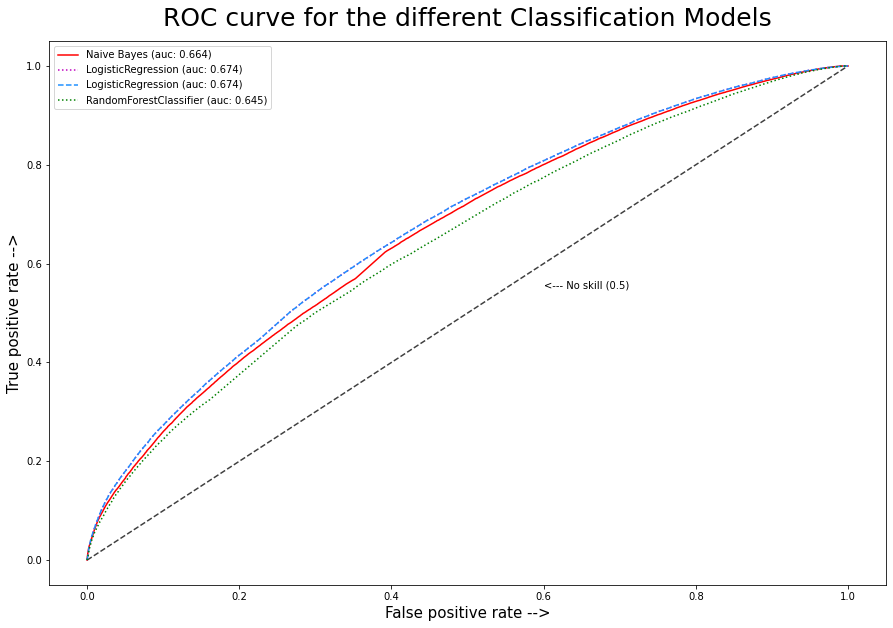

In [30]:
plot_roc_curves(['Naive Bayes','LogisticRegression','LogisticRegression','RandomForestClassifier'],[clf,clf2,clf3,clf4],xtrain,xtest,ytrain,ytest,roc_curve,roc_auc_score)

Naive Bayes Model Metrics:
ROC_AUC_SCORE: 0.664
Accuracy: 0.616
Precision: 0.616
Recall: 0.658
F1-Score: 0.636
Log Loss Score: 13.269
MCC: 0.231


Logistic Regression Model Metrics:
ROC_AUC_SCORE: 0.674
Accuracy: 0.622
Precision: 0.624
Recall: 0.653
F1-Score: 0.638
Log Loss Score: 13.058
MCC: 0.243


Logistic Regression Model Metrics:
ROC_AUC_SCORE: 0.674
Accuracy: 0.622
Precision: 0.624
Recall: 0.653
F1-Score: 0.638
Log Loss Score: 13.058
MCC: 0.243


Random Forest Classifier Model Metrics:
ROC_AUC_SCORE: 0.643
Accuracy: 0.574
Precision: 0.552
Recall: 0.881
F1-Score: 0.678
Log Loss Score: 14.723
MCC: 0.173




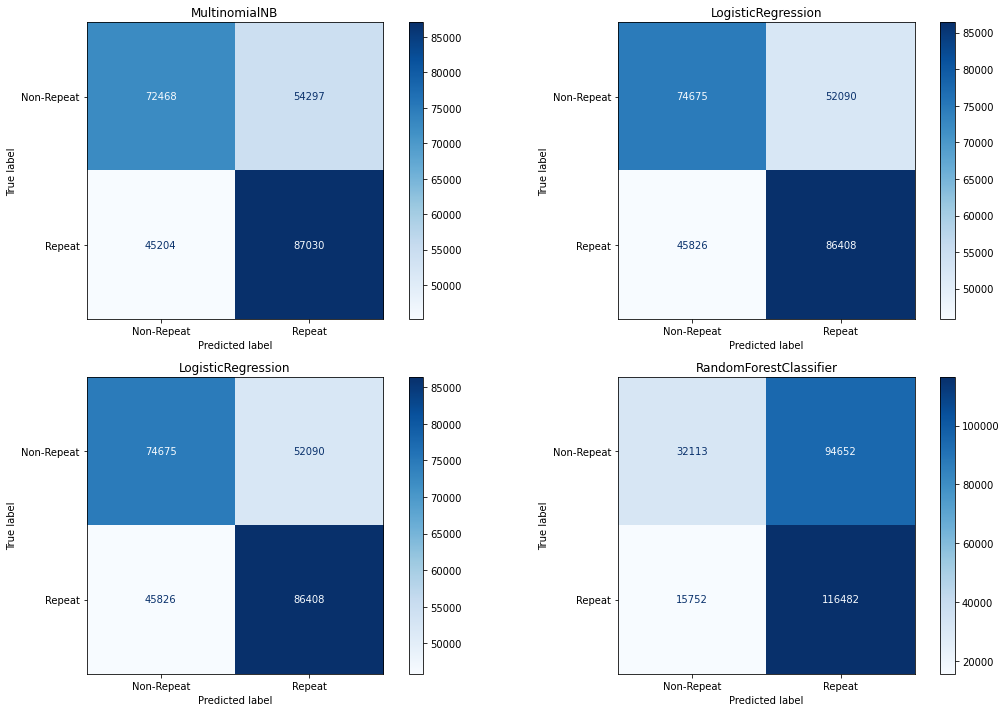

In [31]:
get_model_metrics(['Naive Bayes','Logistic Regression','Logistic Regression','Random Forest Classifier'],[clf,clf2,clf3,clf4],
                  xtrain,xtest,ytrain,ytest,
                  roc_curve,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,log_loss,matthews_corrcoef,plot_confusion_matrix)

In [32]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf3.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:30]]
bad_words = words[ind[-30:]]

good_prob = probs[ind[:30]]
bad_prob = probs[ind[-30:]]

print("Good words\t     P(Good | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Bad words\t     P(Good | word)")
for w, p in zip(bad_words[::-1], bad_prob[::-1]):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))

Good words	     P(Good | word)
        huddersfield 0.98
             cardiff 0.97
           instituto 0.96
            descendi 0.96
            merciars 0.96
              menang 0.95
             goleada 0.95
              boxing 0.95
              cedric 0.94
                gole 0.94
         wilstermann 0.94
                 gio 0.93
                coys 0.93
                alli 0.93
              koeman 0.92
            victoria 0.92
           boxingday 0.92
              arsnew 0.92
             disalip 0.92
              fulham 0.91
               brace 0.91
              totbha 0.91
              arswhu 0.91
            llorente 0.90
             warnock 0.90
              gareth 0.90
              bielsa 0.90
               serge 0.90
               besar 0.90
          underrated 0.90
Bad words	     P(Good | word)
                draw 0.02
              empate 0.02
              imbang 0.04
               gagal 0.04
                rams 0.05
            emeryout 0.05
   

In [33]:
## Exploring all the Words 
all_bad_words = " ".join([word for word in bad_words[::-1]])
wordcloud = WordCloud(width =800, height = 500,
                      random_state = 42, max_font_size=100).generate(all_bad_words)

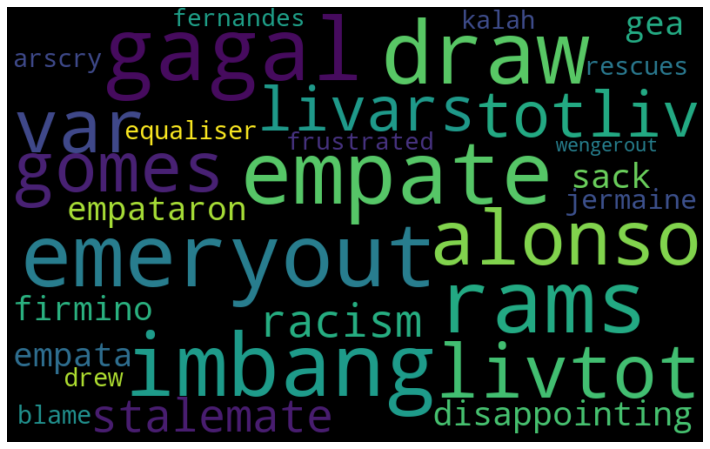

<Figure size 432x288 with 0 Axes>

In [34]:
## Creating visualizawtion  for most found words 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.show()
plt.savefig('.\..\images\All_Tweets_Negative_Words.png')

In [35]:
## Exploring all the Words 
all_good_words = " ".join([word for word in good_words])
wordcloud = WordCloud(width =800, height = 500,
                      random_state = 42, max_font_size=100).generate(all_good_words)

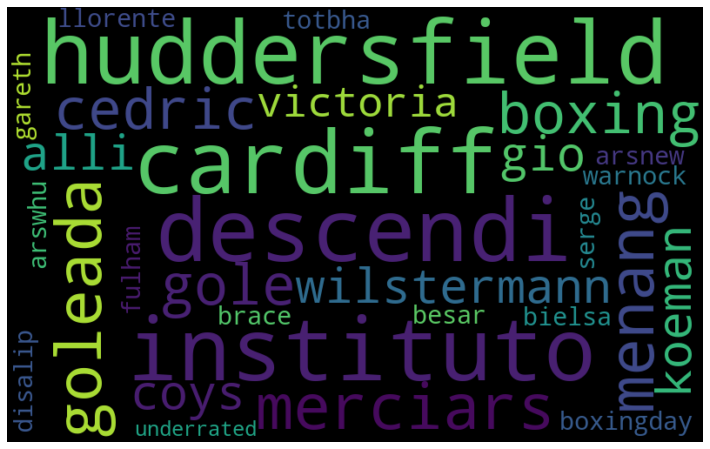

<Figure size 432x288 with 0 Axes>

In [36]:
## Creating visualizations  for most found words 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.show()
plt.savefig('.\..\images\All_Tweets_Positive_Words.png')